# Trabajo Práctico Nro 1 - Redes Neuronales, ITBA 2023
Autor: Pablo Smolkin

Legajo 59523
***

## Problema de Clasificación 

Se utilizará el dataset de Fashion MNIST, que se encuentra en la [competencia de Kaggle](https://www.kaggle.com/t/5f2641ef201d4e8aa500d4876fb2b64e) que quedará abierta hasta el final de la cursada y otorgará puntos extras a los grupos ganadores. La competencia puede hacerse por grupos (la cantidad de integrantes que se deseen pero se reparten los puntos al final). La entrega del TP es individual.

### Imports

In [1]:
from mlp_helper import *

### Load Dataset

In [3]:
x_data, x_test, y_data, class_names = load_fmnist_data()

x data Shape: (60000, 28, 28)
x data Shape: (10000, 28, 28)
y data Shape: (60000,)


##### Old cell testing

### 1. **EDA:** 
Visualizar algunas instancias de cada clase. Hacer histogramas de la distribución de intensidades para cada clase, cualquier otra propuesta es bienvenida.

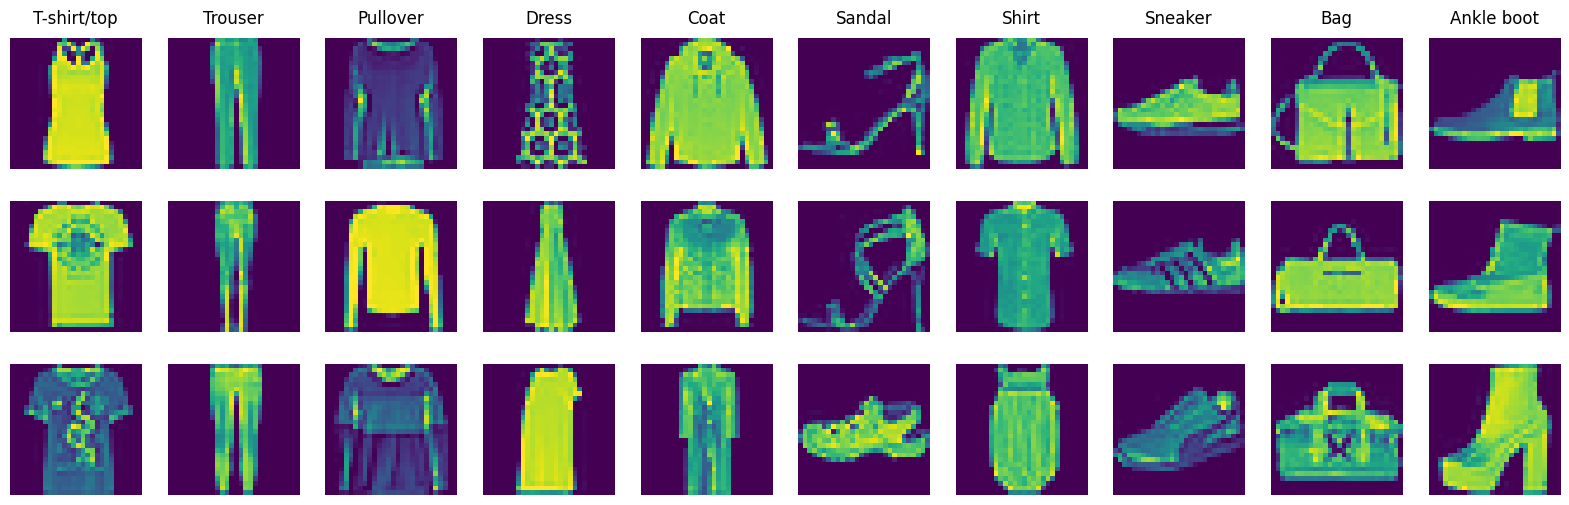

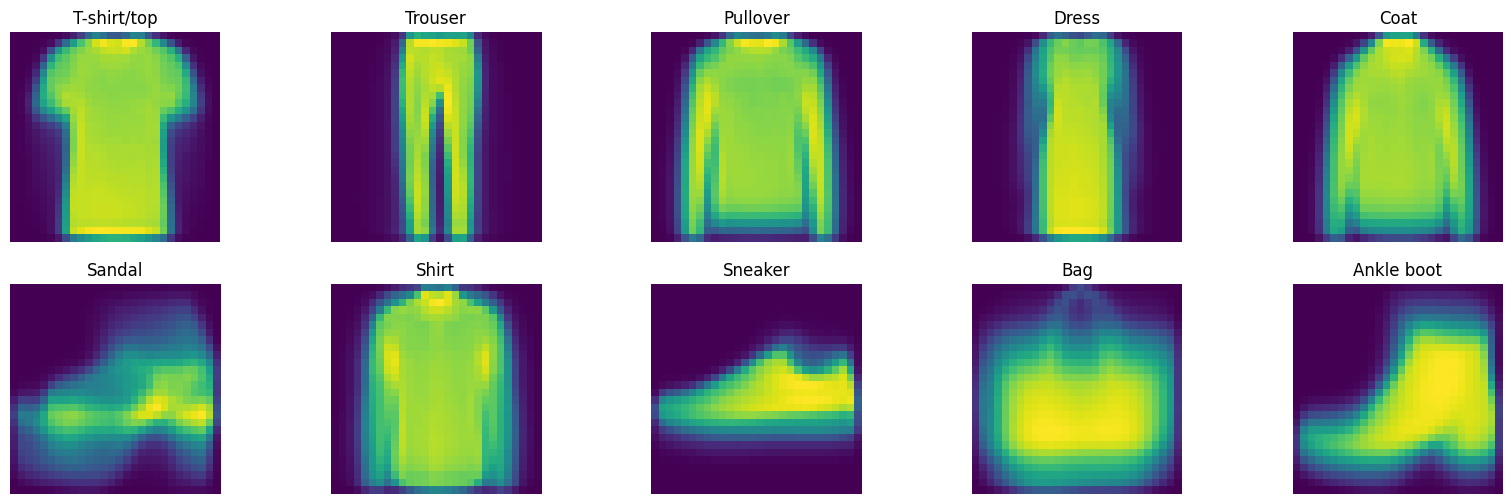

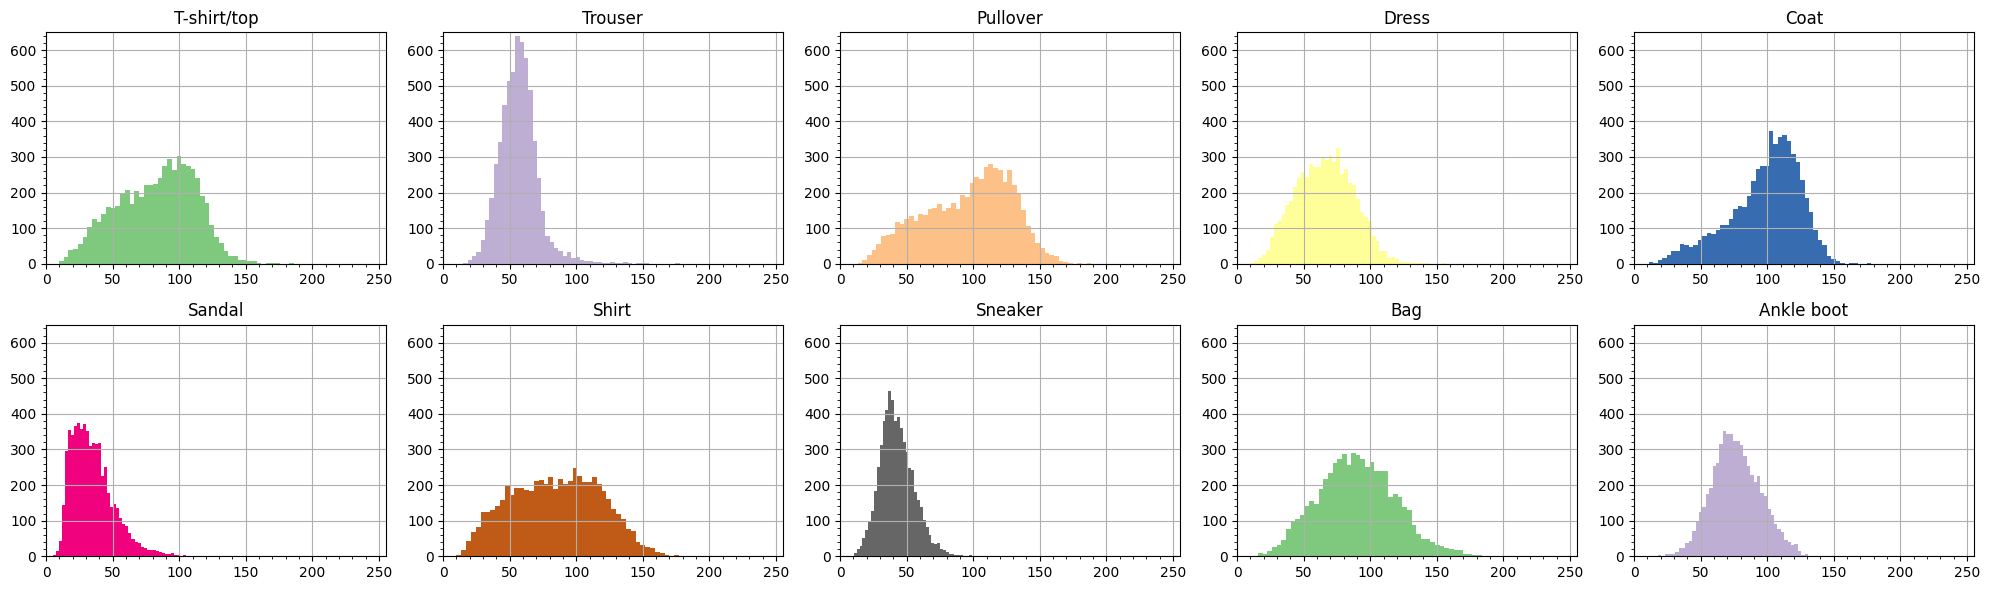

In [3]:
fmnist_eda_plots(x_data, y_data, class_names)

### 2. **Modelos:** 
Entrenar un modelo de clasificación en las 10 clases de Fashion MNIST. Regresión softmax y MLP. En el caso que corresponda probar y comparar: distintas funciones de activación, distintos optimizadores, distintas funciones de costo, distintos tamaños de red (cantidad de capas y tamaño de cada capa), learning rate, batch_size, dropout rates, batch_normalization (si/no), inicializaciones de pesos (glorot_uniform, glorot_normal, normal(0,1), normal(0,0.001)).

Métricas a reportar para cada entrenamiento de interés: Accuracy como métrica principal.
Como métricas secundarias: curva ROC, área bajo la curva ROC, F1-score, Precisión y
Recall. Enunciar para el F1-score y el área bajo la curva ROC cómo se calculan los
promedios macro y micro. Justificar cuál de los dos es el que corresponde reportar en este
problema.

Para un buen modelo obtenido en el punto anterior (así si lo mejoran no tienen que repetir
este punto), variar los hiperparámetros de a uno y graficar:

* Accuracy vs [LEARNING_RATE, BATCH_SIZE, OPTIMIZADORES, ACTIVACIONES, DROPOUT_RATE, BATCH_NORMALIZATION, INICIALIZACIONES DE PESOS]

* Iteraciones de entrenamiento vs [LEARNING_RATE, BATCH_SIZE, OPTIMIZADORES, ACTIVACIONES, DROPOUT_RATE, BATCH_NORMALIZATION, INICIALIZACIONES DE PESOS]

Intente justificar los gráficos obtenidos. Valores mínimos esperados para cada modelo: SoftmaxReg: .70, MLP: .83

### Mejor Modelo Obtenido con Softmax

In [ ]:
softReg, x_train, x_valid, y_train, y_valid = create_fmnist_model(
    x_data,
    y_data,
    metrics=['accuracy','AUC','Precision','Recall'],
    loss='mean_squared_error',
    weight_initializer='glorot_normal',
    optimizer='Adam',
    learning_rate=0.0001,
    train_valid_proportion=1/3,
    random_state_seed=10,
    verbose=False
)

history, metrics_df, id = run_model(
    model=softReg,
    x_train=x_train,
    x_valid=x_valid,
    y_train=y_train,
    y_valid=y_valid,
    batch_size=32,
    max_epochs=100,
    es_config = {
        'monitor': 'val_accuracy',
        'patience': 10,
        'mode': 'max',
        'restore_best_weights': True
    },
    show_metrics=True,
    verbose=False
)

print(f'Model ID: {id}')

              train       val
accuracy   0.886850  0.857500
auc        0.987619  0.984487
f1         0.888321  0.855448
loss       0.017692  0.021183
precision  0.909287  0.880603
recall     0.864800  0.836000
Model ID: 20230521-222644


ID: 20230521-222644, Validation accuracy: 0.8575000166893005

### Mejor Modelo conseguido de forma burda (coarse testing), MLP

In [ ]:
model, x_train, x_valid, y_train, y_valid = create_fmnist_model(
    x_data,
    y_data,
    metrics=['accuracy','AUC','Precision','Recall'],
    loss='categorical_crossentropy',
    hidden_layers=3,
    hidden_units=[512, 64, 64],
    weight_initializer='glorot_normal',
    optimizer='Nadam',
    learning_rate=0.001,
    activation='elu',
    batch_normalization=True,
    dropout_rate=0.3,
    train_valid_proportion=1/3,
    random_state_seed=10,
    verbose=False
)

history, metrics_df, id = run_model(
    model=model,
    x_train=x_train,
    x_valid=x_valid,
    y_train=y_train,
    y_valid=y_valid,
    batch_size=64,
    max_epochs=100,
    reduce_lr_config = {
            'monitor': 'val_accuracy',
            'factor': 0.2,
            'patience': 5,
            'min_lr': 0.00005
    },
    es_config = {
        'monitor': 'val_accuracy',
        'patience': 10,
        'mode': 'max',
        'restore_best_weights': True,
        'min_delta': 0.003
    },
    show_metrics=True,
    verbose=False
)

print(f'Model ID: {id}')

                  train          val
accuracy       0.929725     0.903050
auc            0.997023     0.992666
f1             0.954611     0.902439
iterations  1472.000000  1472.000000
loss           0.192251     0.291165
lr             0.000200          NaN
precision      0.938320     0.911821
recall         0.921125     0.897050
Model ID: 20230531-103839


ID: 20230531-103839, Validation accuracy: 0.9030500054359436

In [4]:
best_model = tf.keras.models.load_model(f'models/fmnist_mlp_coarse/20230531-103839.h5')
test_predictions = np.argmax(best_model.predict(x_test), axis=-1)

313/313 [==============================] - 1s 2ms/step


In [5]:
submission = pd.DataFrame({'id': np.arange(len(test_predictions)), 'Category': test_predictions})
submission.to_csv('submission2.csv', index=False)

#### Learning Rate Sweep

In [3]:
learning_rates = [0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1]
accuracy_arr_lr, val_accuracy_arr_lr, iterations_arr_lr = get_plot_data_vs_param(x_data=x_data, y_data=y_data, param_name='learning_rate', param_data=learning_rates) 
np.save('plotting_data2/lr', [learning_rates, accuracy_arr_lr, val_accuracy_arr_lr, iterations_arr_lr])

#### Batch Size Sweep

In [4]:
batch_sizes = [8, 16, 32, 64, 128, 256, 512]
accuracy_arr_bs, val_accuracy_arr_bs, iterations_arr_bs = get_plot_data_vs_param(x_data=x_data, y_data=y_data, param_name='batch_size', param_data=batch_sizes)
np.save('plotting_data2/bs', [batch_sizes, accuracy_arr_bs, val_accuracy_arr_bs, iterations_arr_bs])

#### Optimizer Sweep

In [5]:
optimizers = ['SGD', 'RMSprop', 'Adam', 'Nadam']
accuracy_arr_opt, val_accuracy_arr_opt, iterations_arr_opt = get_plot_data_vs_param(x_data=x_data, y_data=y_data, param_name='optimizer', param_data=optimizers)
np.save('plotting_data2/opt', [optimizers, accuracy_arr_opt, val_accuracy_arr_opt, iterations_arr_opt])

#### Activation Function Sweep

In [6]:
activators = ['relu', 'leaky_relu', 'sigmoid', 'tanh', 'elu']
accuracy_arr_act, val_accuracy_arr_act, iterations_arr_act = get_plot_data_vs_param(x_data=x_data, y_data=y_data, param_name='activation', param_data=activators)
np.save('plotting_data2/act', [activators, accuracy_arr_act, val_accuracy_arr_act, iterations_arr_act])

#### Dropout Rate Sweep

In [3]:
dropout_rates = [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
accuracy_arr_dr, val_accuracy_arr_dr, iterations_arr_dr = get_plot_data_vs_param(x_data=x_data, y_data=y_data, param_name='dropout_rate', param_data=dropout_rates)
np.save('plotting_data2/dr', [dropout_rates, accuracy_arr_dr, val_accuracy_arr_dr, iterations_arr_dr])

#### Batch Normalization Y/N

In [4]:
batch_normalizations = [False, True]
accuracy_arr_bn, val_accuracy_arr_bn, iterations_arr_bn = get_plot_data_vs_param(x_data=x_data, y_data=y_data, param_name='batch_normalization', param_data=batch_normalizations)
np.save('plotting_data2/bn', [batch_normalizations, accuracy_arr_bn, val_accuracy_arr_bn, iterations_arr_bn])

#### Weight Initialization Sweep

In [5]:
weight_initializers = ['glorot_normal', 'glorot_uniform', 'random_normal', 'random_uniform']
accuracy_arr_wi, val_accuracy_arr_wi, iterations_arr_wi = get_plot_data_vs_param(x_data=x_data, y_data=y_data, param_name='weight_initializer', param_data=weight_initializers)
np.save('plotting_data2/wi', [weight_initializers, accuracy_arr_wi, val_accuracy_arr_wi, iterations_arr_wi])

d:\VSCodeRepos\RN-TP1\venv\lib\site-packages\keras\initializers\initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


#### Loss Function Sweep

In [6]:
losses = ['categorical_crossentropy', 'mse', 'mae']
accuracy_arr_loss, val_accuracy_arr_loss, iterations_arr_loss = get_plot_data_vs_param(x_data=x_data, y_data=y_data, param_name='loss', param_data=losses)
np.save('plotting_data2/loss', [losses, accuracy_arr_loss, val_accuracy_arr_loss, iterations_arr_loss])

### Plotting sweep results

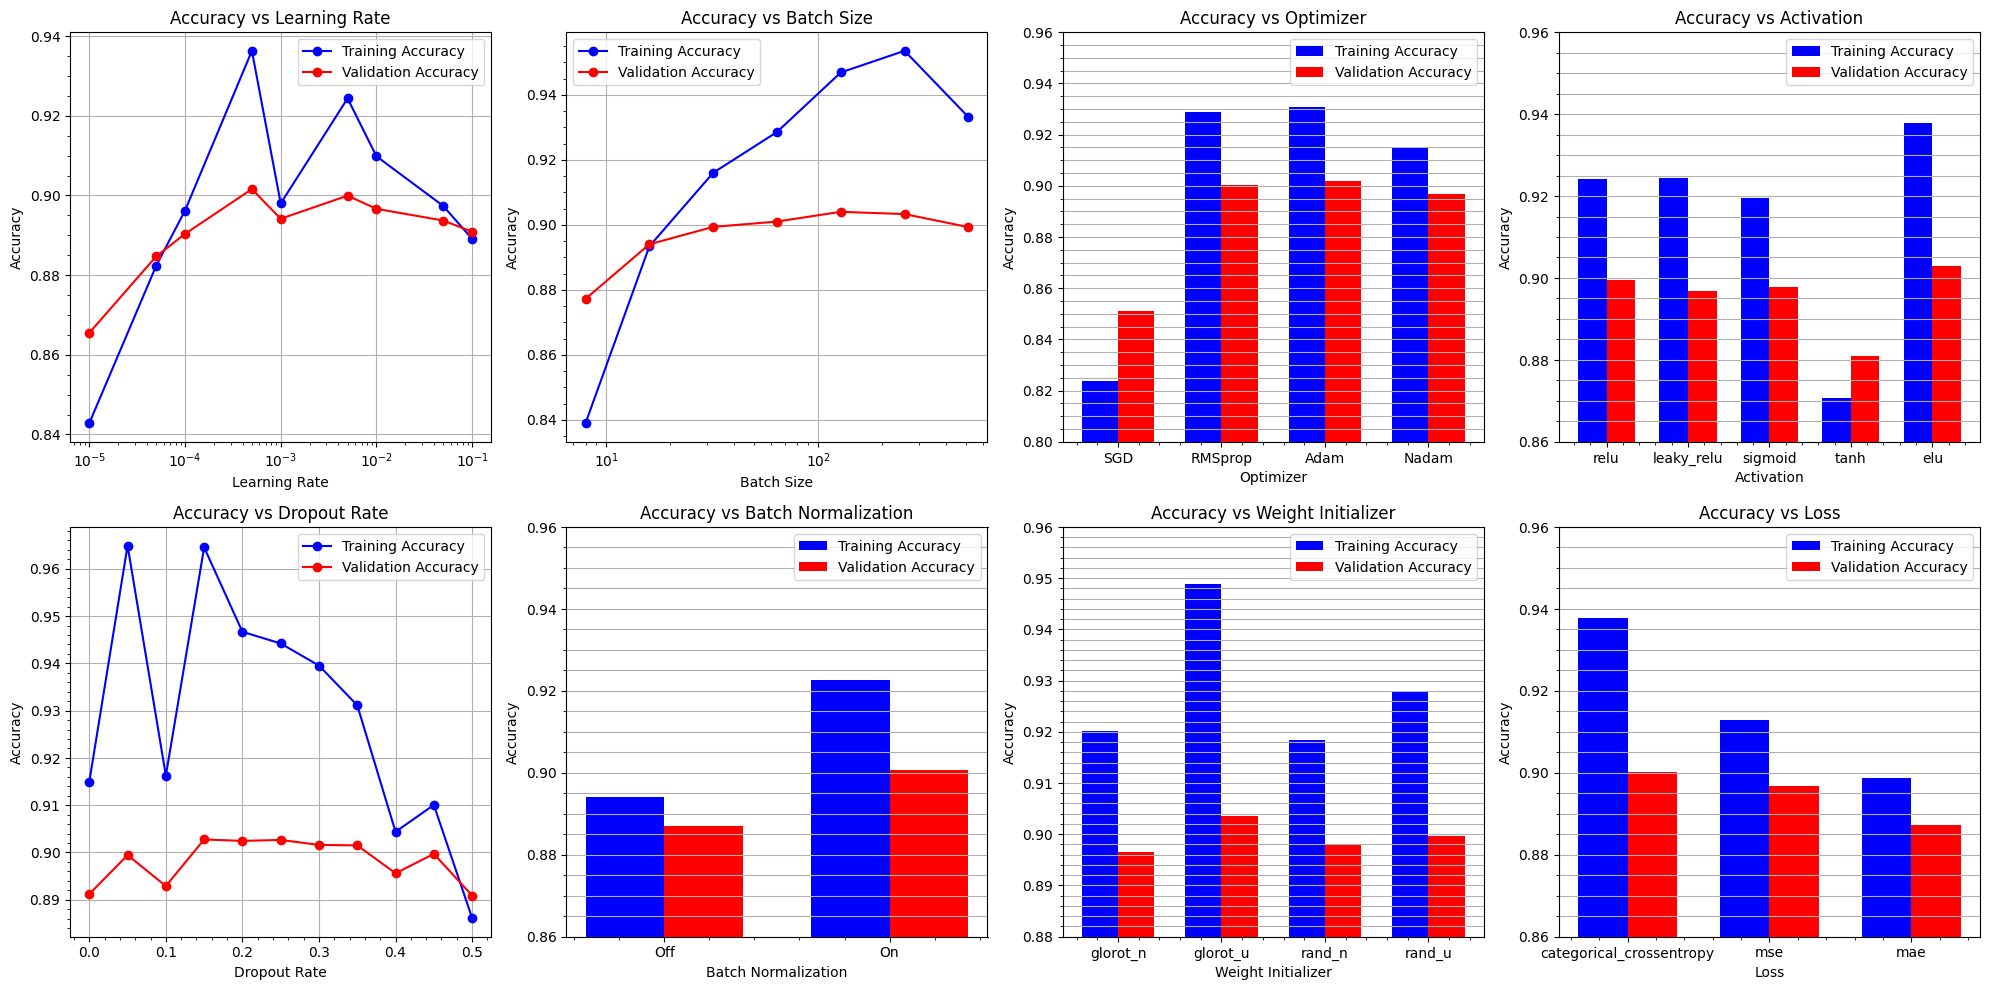

In [2]:
plot_sweep_results(metric='Accuracy', dir='plotting_data2')

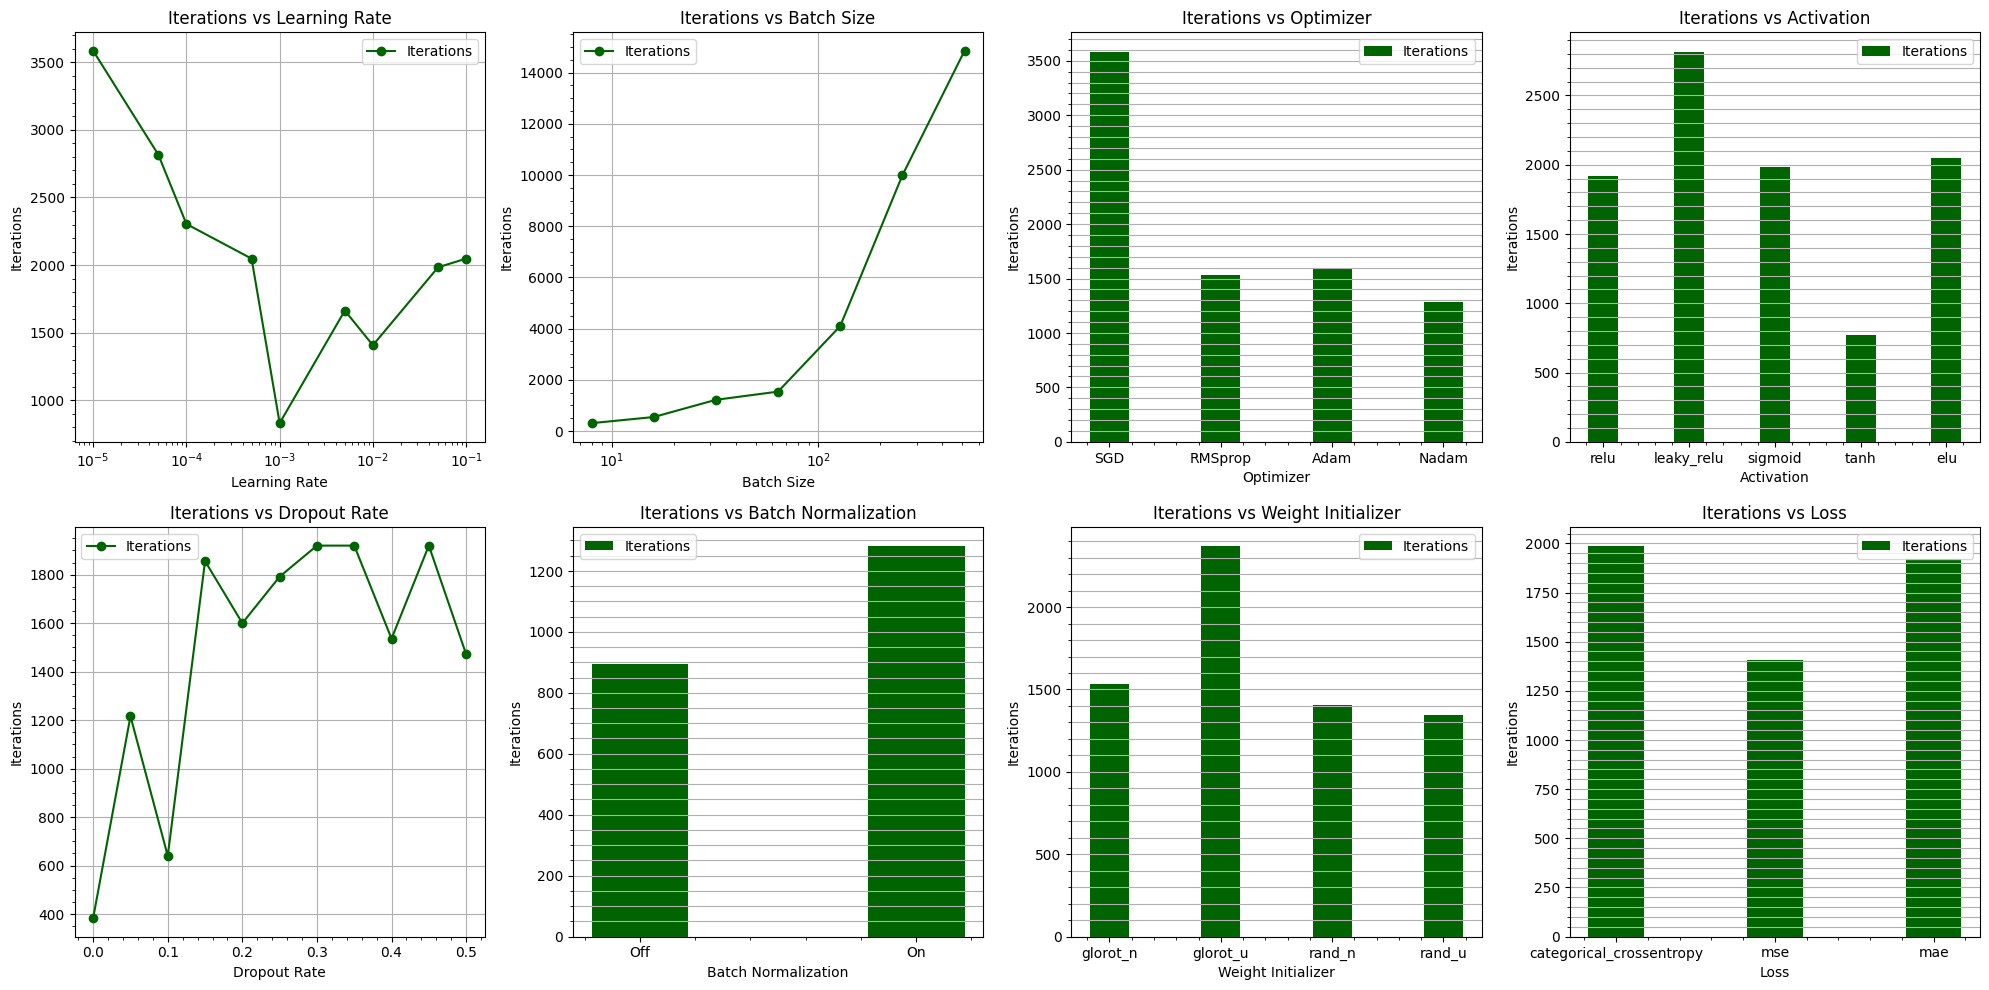

In [3]:
plot_sweep_results(metric='Iterations', dir='plotting_data2')

### 3. 
El mejor modelo debe ser reentrenado agregando una capa de tamaño 2 antes de la de salida. Mapear los datos de entrada a la salida de la capa agregada y graficarla con los labels correspondientes. Superponer en el mismo gráfico los umbrales de decisión. Para obtener los umbrales de decisión se debe armar una grilla de puntos que debe darse como input a la última capa de la red neuronal (softmax) y tomar el argumento máximo como clase correspondiente.
   
Se alienta a intentar aumentar los datos de entrenamiento haciendo espejamiento de las imágenes en las situaciones que tenga sentido hacerlo. 

Una vez entregado el TP se pueden seguir subiendo predicciones de modelos nuevos a Kaggle hasta el final de la cursada.

In [4]:
model, x_train, x_valid, y_train, y_valid = create_fmnist_model(
    x_data,
    y_data,
    metrics=['accuracy','AUC','Precision','Recall'],
    loss='categorical_crossentropy',
    hidden_layers=3,
    hidden_units=[512, 64, 64],
    weight_initializer='glorot_normal',
    optimizer='Nadam',
    learning_rate=0.001,
    activation='elu',
    batch_normalization=True,
    dropout_rate=0.3,
    feature_layer=True,
    train_valid_proportion=1/3,
    random_state_seed=10,
    verbose=False
)

history, metrics_df, id = run_model(
    model=model,
    x_train=x_train,
    x_valid=x_valid,
    y_train=y_train,
    y_valid=y_valid,
    batch_size=64,
    max_epochs=100,
    reduce_lr_config = {
            'monitor': 'val_accuracy',
            'factor': 0.2,
            'patience': 5,
            'min_lr': 0.00005
    },
    es_config = {
        'monitor': 'val_accuracy',
        'patience': 10,
        'mode': 'max',
        'restore_best_weights': True,
        'min_delta': 0.003
    },
    show_metrics=True,
    verbose=False
)

                  train          val
accuracy       0.868800     0.879300
auc            0.986025     0.983813
f1             0.919953     0.879595
iterations  1536.000000  1536.000000
loss           0.451836     0.515667
lr             0.001000          NaN
precision      0.899637     0.905022
recall         0.842150     0.860450


In [13]:
# Extract features from the hidden layer with 2 neurons for validation set
features_val = extract_features(model, x_valid)

625/625 [==============================] - 1s 2ms/step


In [14]:
xx, yy, boundaries = get_boundary_predictions(model)

313/313 [==============================] - 0s 735us/step


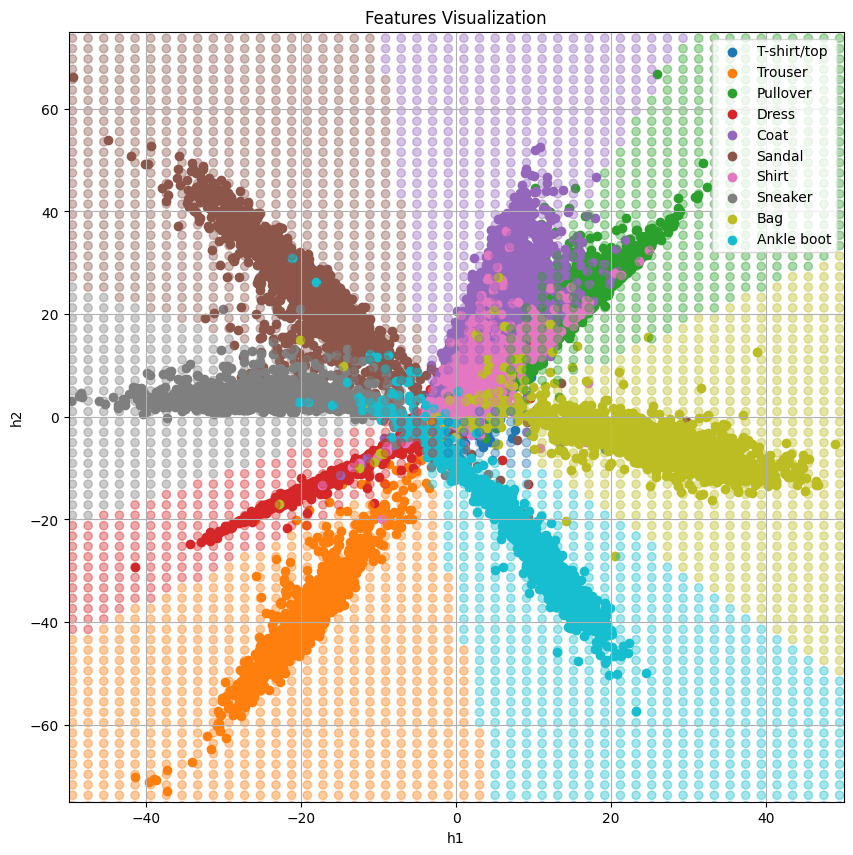

In [7]:
visualize_features(features_val, y_valid, xx, yy, boundaries, class_names)